In [167]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd
import seaborn as sns

# Preprocessing data
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Metrics
from sklearn.metrics import f1_score, recall_score, confusion_matrix

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Fine-tune
from sklearn.model_selection import RandomizedSearchCV

# Resample
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [24]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [15]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna(axis = 'columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [12]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna(axis='columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [6]:
nRowsRead = 1000 #previewing just 1000 rows
df1 = pd.read_csv('creditcard.csv', delimiter=',', nrows= nRowsRead)
df1.dataframeName = 'creditcard.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 31 columns


In [7]:
df1.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
plt.rcParams['figure.dpi'] = 150
sns.set_style('dark')

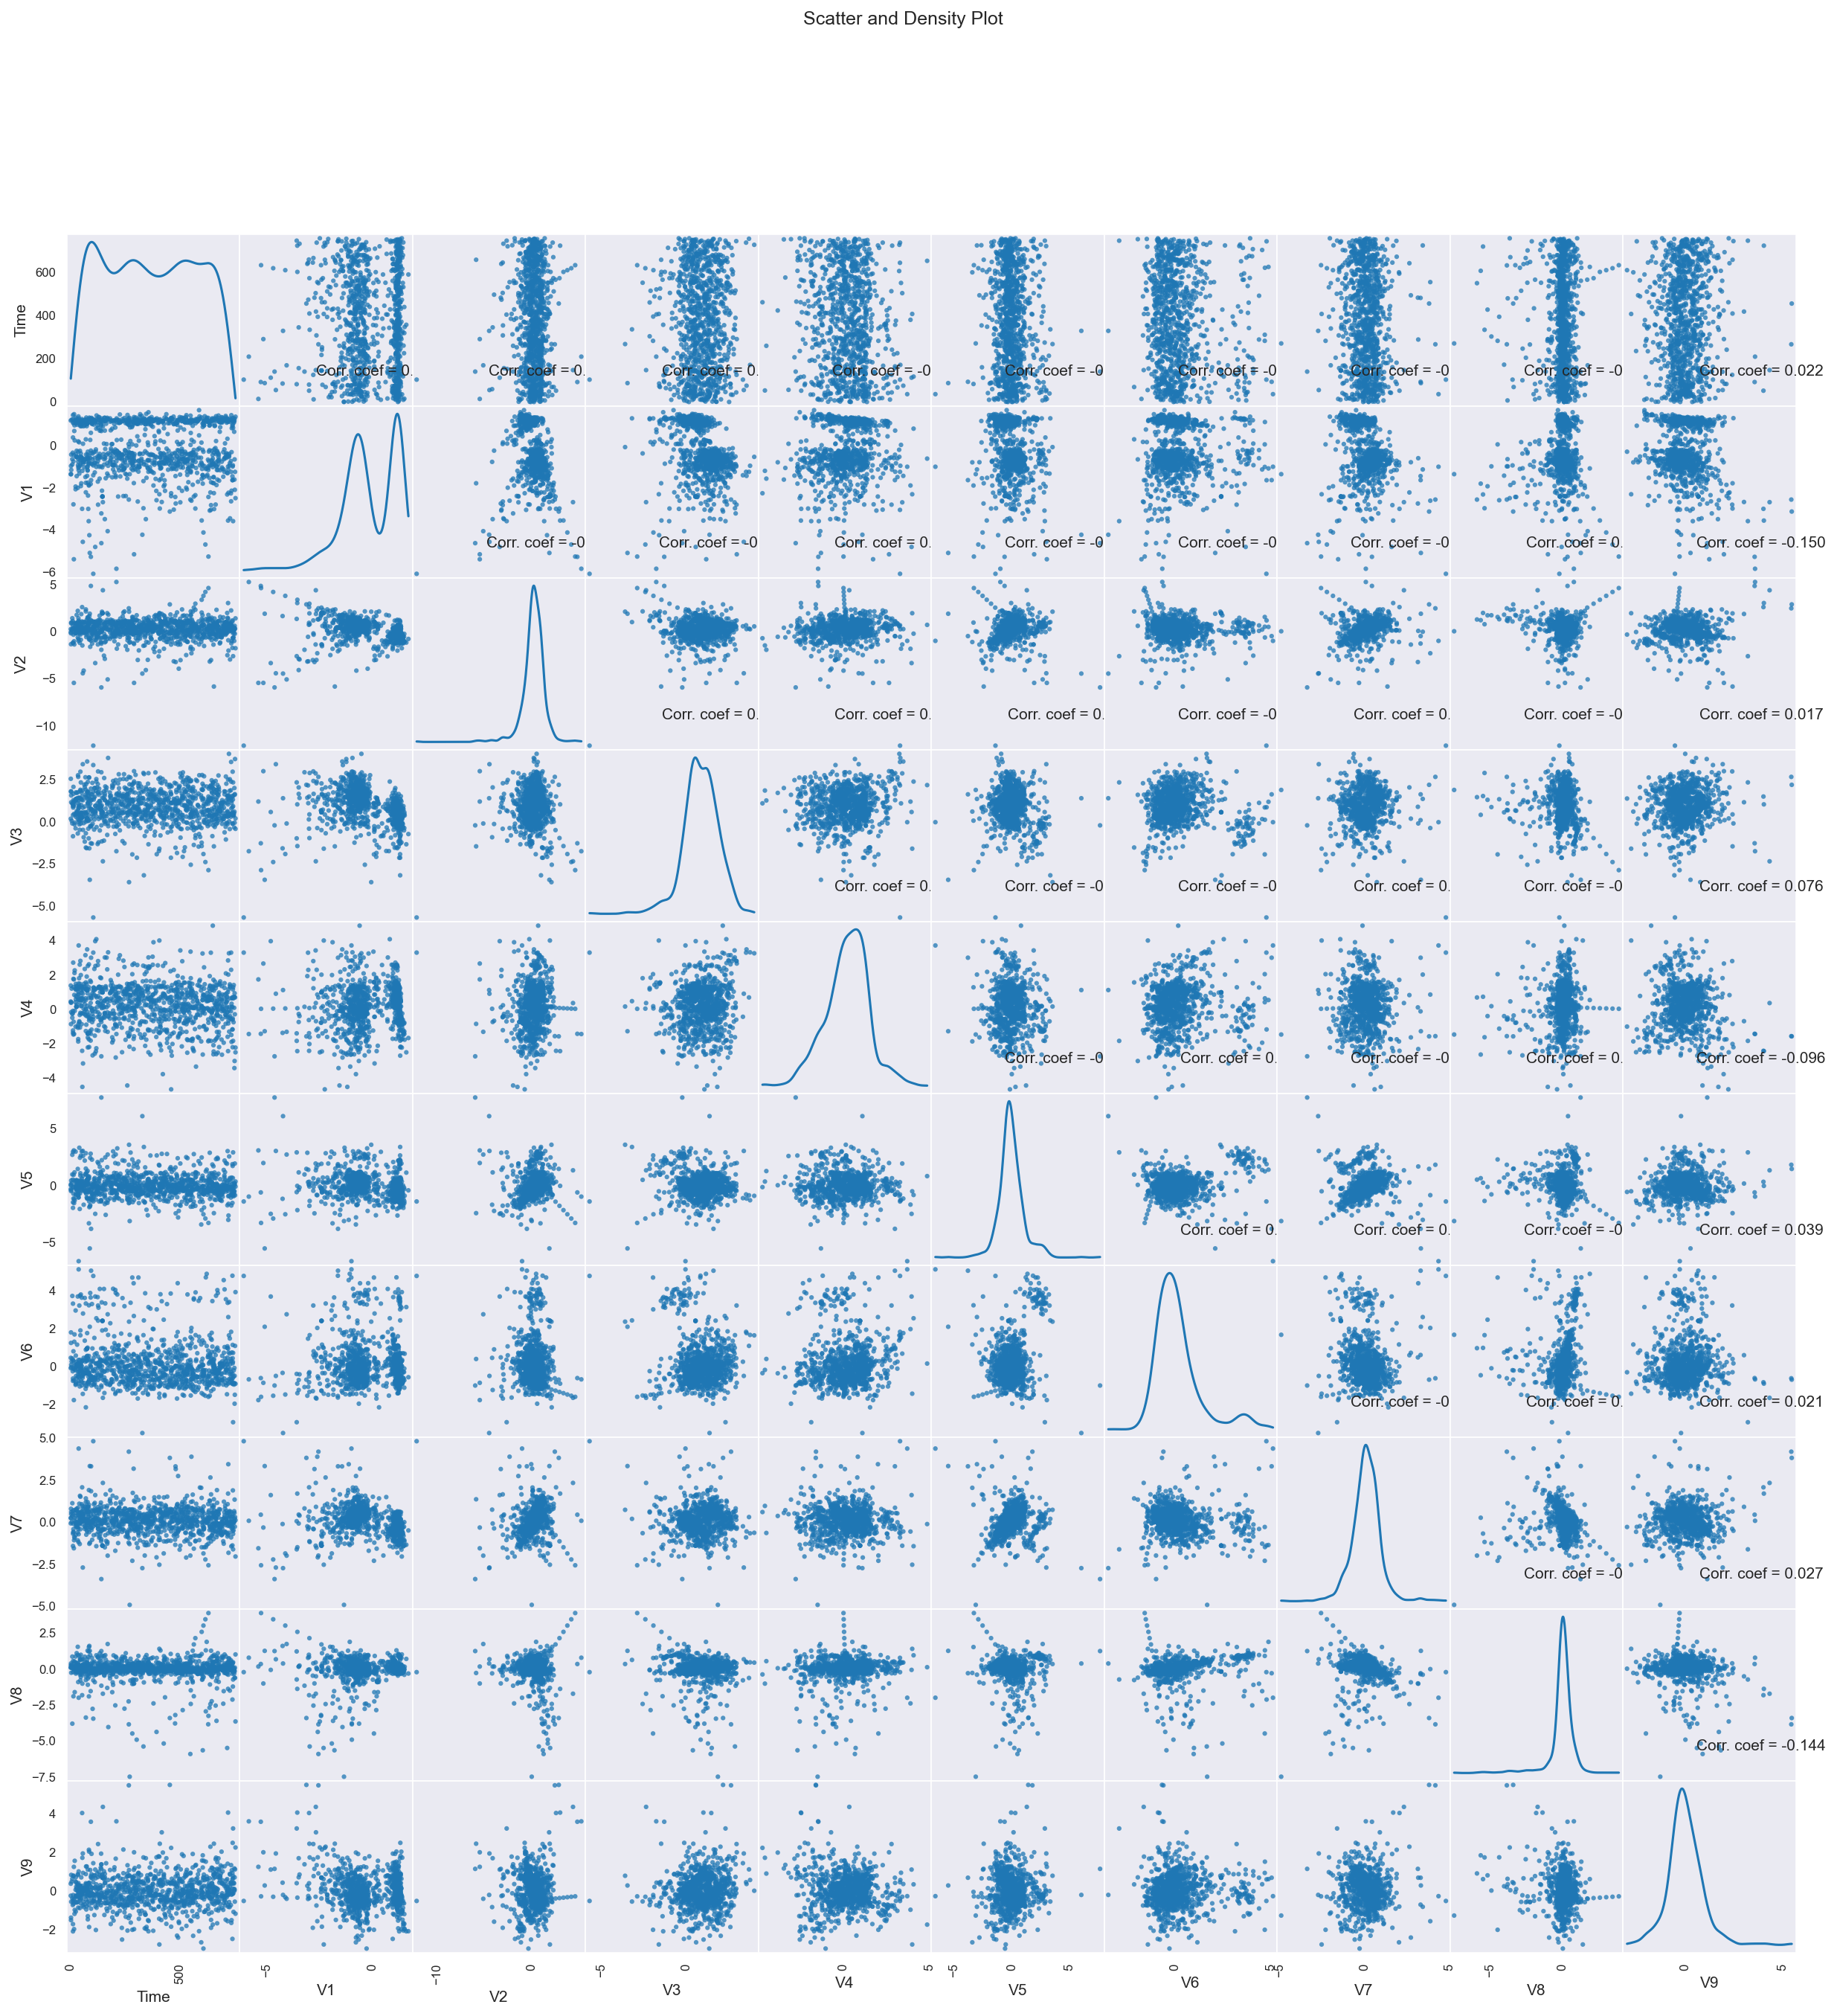

In [27]:
plotScatterMatrix(df1, 20, 10)

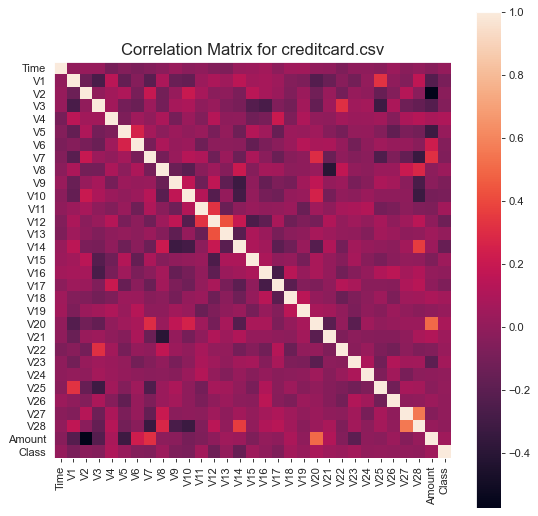

In [28]:
plotCorrelationMatrix(df1, 8)

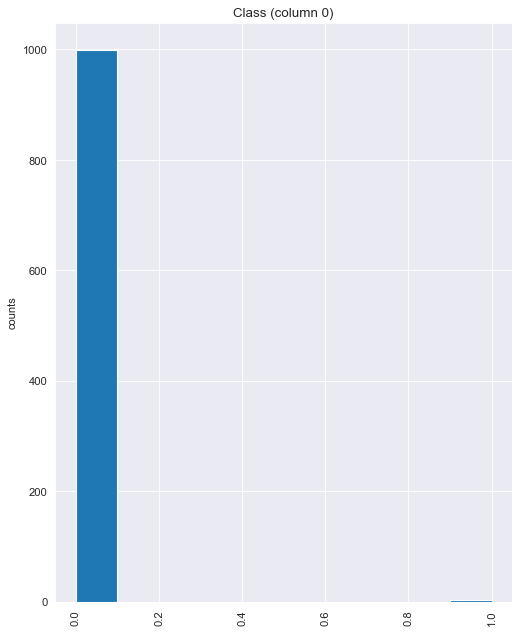

In [29]:
plotPerColumnDistribution(df1, 10, 5)

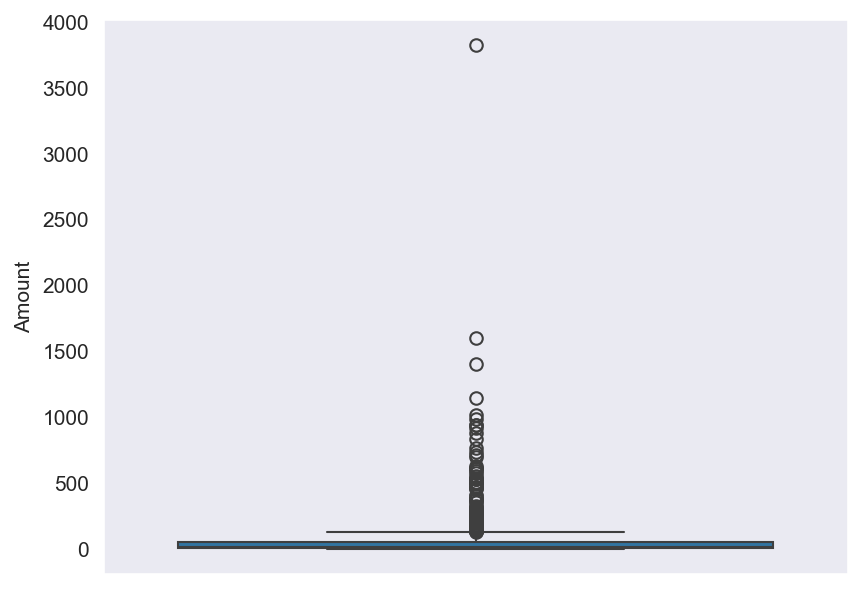

In [30]:
# to catch a glimpse of the outliers
sns.boxplot(data=df1, y='Amount')
plt.show()

In [31]:
# loading the dataset
df = pd.read_csv('creditcard.csv')

In [36]:
X_df = df.drop(['Class'], axis=1)
y_df = df['Class']

In [37]:
train_test_sss = StratifiedShuffleSplit(n_splits = 1, test_size= 0.2, random_state=42)
for train_index, test_index in train_test_sss.split(X_df, y_df):
    train_df = df.loc[train_index]
    test_df = df.loc[test_index]

In [38]:
X_train_df = train_df.drop(['Class'], axis=1)
y_train_df = train_df['Class']

In [39]:
train_val_sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, val_index in train_val_sss.split(X_train_df, y_train_df):
    train_df = df.loc[train_index]
    val_df = df.loc[val_index]

In [40]:
train_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
225121,144115.0,2.260499,-0.672775,-1.730349,-1.186476,0.113699,-0.361084,-0.310538,-0.206716,-0.739631,...,0.013536,0.101338,0.052963,-1.133791,0.107662,-0.226698,-0.037289,-0.085215,4.45,0
61995,50083.0,0.474826,-1.600174,0.372791,-0.602230,-1.298861,-0.120802,-0.128786,-0.029808,1.403290,...,0.416361,0.612892,-0.541799,0.104079,0.533606,-0.573770,0.024304,0.089797,391.30,0
197454,132022.0,2.038625,-0.197583,-1.477283,0.166705,0.089200,-0.691551,-0.035744,-0.053390,0.620787,...,0.270211,0.776487,0.051810,0.746167,0.185787,-0.157799,-0.041134,-0.065754,1.00,0
116739,74407.0,-1.269508,2.384286,-1.008598,0.933525,-0.551805,-1.306949,0.001500,0.960055,-0.855683,...,0.216123,0.644880,0.181321,0.428130,-0.491161,-0.403557,0.284246,0.165831,2.28,0
169028,119492.0,2.040578,-0.146368,-2.955721,-0.578510,2.609546,3.142573,-0.417135,0.784442,0.359925,...,-0.352449,-0.996836,0.363652,0.604817,-0.264490,0.219691,-0.039174,-0.042820,1.79,0


In [41]:
train_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [48]:
# To show how extremely imbalanced the dataset is 
# only 0.18% instances of the instances are fraud
label_perc = train_df['Class'].value_counts(normalize=True) * 100
label_perc

Class
0    99.816761
1     0.183239
Name: proportion, dtype: float64

In [50]:
train_df.corr()['Class'].sort_values()

V17      -0.362884
V14      -0.313362
V12      -0.269756
V10      -0.238518
V16      -0.219037
V3       -0.215121
V7       -0.214055
V18      -0.128889
V1       -0.111857
V5       -0.109178
V9       -0.101438
V6       -0.044186
Time     -0.013098
V24      -0.007756
V15      -0.005866
V23      -0.003444
V13      -0.001646
V25      -0.000684
V22       0.000467
V26       0.000546
Amount    0.004786
V28       0.009031
V8        0.015440
V20       0.017704
V27       0.021062
V19       0.038386
V21       0.052034
V2        0.100242
V4        0.137693
V11       0.165494
Class     1.000000
Name: Class, dtype: float64

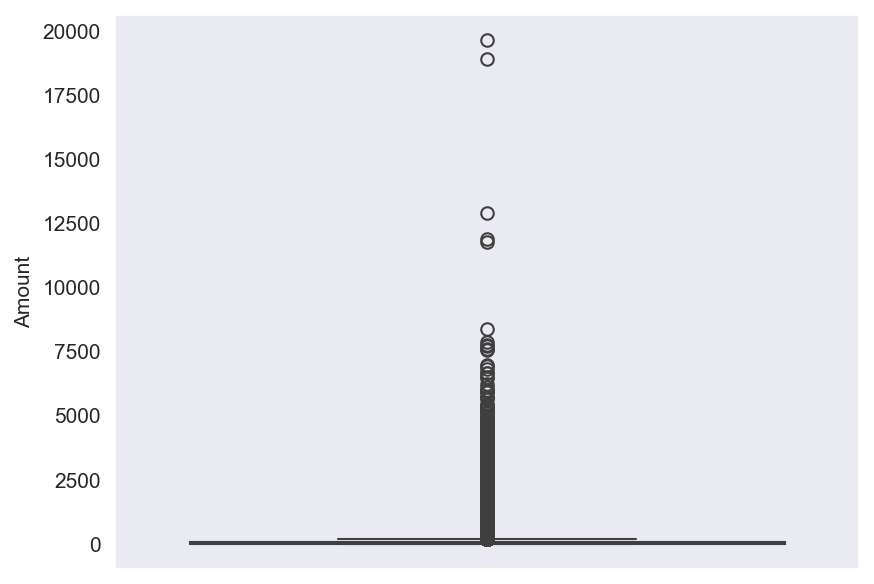

In [52]:
# going back to the outliers 
sns.boxplot(data=train_df, y ='Amount')
plt.show()

In [57]:
# the prescence of the outliers could skew the dataset
# so we attempt to remove the outliers 
feature_outlier = dict()

class Outlier:
    def __init__ (self, q1 , q3):
        self.q1 = q1
        self.q3 = q3
        self.iqr = q3-q1

    def get_outlier_boundary(self):
        lower_fence = self.q1 - 1.5 * self.iqr
        upper_fence = self.q3 + 1.5 * self.iqr
        return lower_fence, upper_fence
    
    
    
def filter_outlier(df, cols=[]):
    if 'is_outlier' not in df.columns:
        df['is_outlier'] = (False) * len(df)

    for col in cols:
        if col in feature_outlier.keys():
            outlier = feature_outlier[col]
        else:
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)

            outlier= Outlier(q1, q3)
            feature_outlier[col] = outlier

        lower_fence, upper_fence = outlier.get_outlier_boundary()
        outlier = (df[col] < lower_fence) | (df[col] > upper_fence)

        df['is_outlier'] = outlier | df ['is_outlier']

    df = df[~df['is_outlier']]
    df = df.drop(['is_outlier'], axis=1)

    return df

In [58]:
train_df = filter_outlier(train_df, cols=['Amount'])

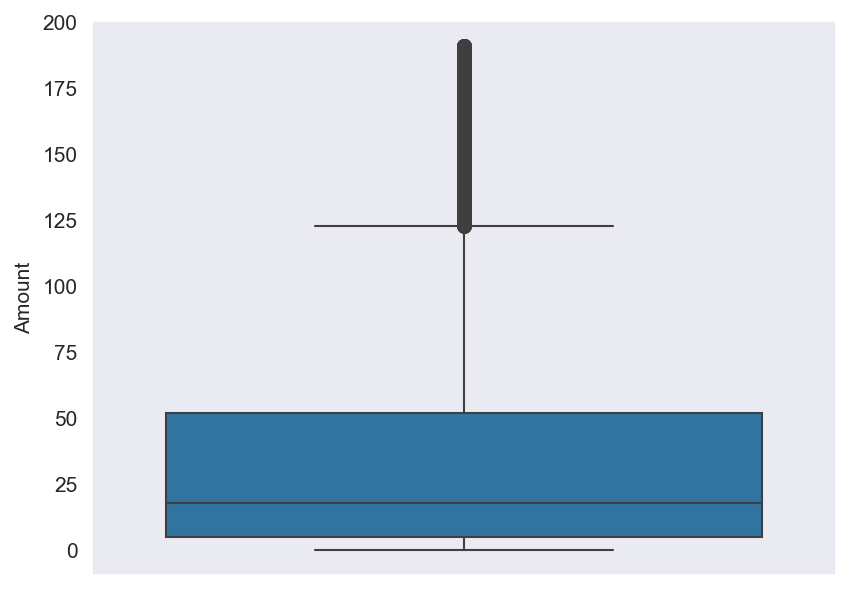

In [59]:
sns.boxplot(data=train_df, y='Amount')
plt.show() 

In [62]:
# feature scaling the 'Amount' and 'Time' features so the model doesn't think they're more important and place more emphasis on them
std_grp = ['Amount', 'Time']
std_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [63]:
full_pipeline = ColumnTransformer([('std_grp', std_pipeline, std_grp)], remainder='passthrough')

In [64]:
X_train = train_df.drop(['Class'], axis = 1)
y_train = train_df['Class']
X_train = full_pipeline.fit_transform(X_train)

In [65]:
X_val = val_df.drop(['Class'], axis = 1)
y_val = val_df['Class']
X_val = full_pipeline.transform(X_val)

In [66]:
X_test = test_df.drop(['Class'], axis=1)
y_test = test_df['Class']
X_test = full_pipeline.transform(X_test)

In [235]:
# Since the dataset is extremely imbalanced, we would use 'recall' and 'f1-score' as the metrics to evaluate the model.
model_eval = {
    'model': [],
    'recall': [],
    'f1_score': []
}

def add_eval(model, recall, f1_score):
    model_eval['model'].append(model)
    model_eval['recall'].append(f'{recall: .2f}')
    model_eval['f1_score'].append(f'{f1_score: .2f}')

def view_eval(sort=False):
    eval_df = pd.DataFrame(model_eval)

    if sort:
        eval_df = eval_df.sort_values(by=['recall', 'f1_score'], ascending=[False, False])

    display(eval_df.style.hide())

In [236]:
# We will use logistic regression as our benchmark model as it is the most common model for binary classification
log_reg = LogisticRegression(verbose=1)
log_reg.fit(X_train, y_train)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           31     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12286D+05    |proj g|=  8.07180D+04


 This problem is unconstrained.



At iterate   50    f=  6.18153D+02    |proj g|=  4.81710D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   31     76     85      1     0     0   3.833D-02   6.181D+02
  F =   618.14402086689574     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


LogisticRegression(verbose=1)

In [237]:
y_pred = log_reg.predict(X_val)
add_eval('logistic regression', recall_score(y_val, y_pred), f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

array([[45478,     8],
       [   41,    42]])

In [238]:
view_eval()

model,recall,f1_score
logistic regression,0.51,0.63


In [239]:
# Stochastic Gradient Descent (SGD) Classifier 
sgd_mod = SGDClassifier(verbose=1)
sgd_mod.fit(X_train, y_train)

-- Epoch 1
Norm: 19.72, NNZs: 30, Bias: -175.943419, T: 161994, Avg. loss: 0.137677
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 18.05, NNZs: 30, Bias: -172.198438, T: 323988, Avg. loss: 0.076382
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 16.63, NNZs: 30, Bias: -170.006153, T: 485982, Avg. loss: 0.074458
Total training time: 0.10 seconds.
-- Epoch 4
Norm: 16.97, NNZs: 30, Bias: -168.361857, T: 647976, Avg. loss: 0.072137
Total training time: 0.14 seconds.
-- Epoch 5
Norm: 15.97, NNZs: 30, Bias: -167.219076, T: 809970, Avg. loss: 0.069554
Total training time: 0.17 seconds.
-- Epoch 6
Norm: 16.77, NNZs: 30, Bias: -166.128185, T: 971964, Avg. loss: 0.069367
Total training time: 0.20 seconds.
-- Epoch 7
Norm: 16.38, NNZs: 30, Bias: -165.299966, T: 1133958, Avg. loss: 0.068531
Total training time: 0.23 seconds.
-- Epoch 8
Norm: 16.49, NNZs: 30, Bias: -164.542551, T: 1295952, Avg. loss: 0.068195
Total training time: 0.27 seconds.
-- Epoch 9
Norm: 16.50, NNZs: 30, Bias: -163.8

SGDClassifier(verbose=1)

In [240]:
y_pred = sgd_mod.predict(X_val)
add_eval('sgd classifier', recall_score(y_val, y_pred), f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

array([[45476,    10],
       [   40,    43]])

In [241]:
view_eval()

model,recall,f1_score
logistic regression,0.51,0.63
sgd classifier,0.52,0.63


In [242]:
# Random Forest Classifier 
ran_for = RandomForestClassifier(verbose=2, n_jobs=4)
ran_for.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   51.8s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:  2.3min finished


RandomForestClassifier(n_jobs=4, verbose=2)

In [243]:
y_pred = ran_for.predict(X_val)
add_eval('random forest classifier', recall_score(y_val,y_pred), f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


array([[45481,     5],
       [   18,    65]])

In [244]:
view_eval()

model,recall,f1_score
logistic regression,0.51,0.63
sgd classifier,0.52,0.63
random forest classifier,0.78,0.85


In [245]:
# support vector machine
svm_mod = SVC(verbose=2)
svm_mod.fit(X_train, y_train)

[LibSVM]..
*..*
optimization finished, #iter = 4462
obj = -224.694419, rho = -0.728710
nSV = 1937, nBSV = 138
Total nSV = 1937


SVC(verbose=2)

In [246]:
y_pred = svm_mod.predict(X_val)
add_eval('support vector machine', recall_score(y_val, y_pred), f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

array([[45482,     4],
       [   33,    50]])

In [247]:
view_eval()

model,recall,f1_score
logistic regression,0.51,0.63
sgd classifier,0.52,0.63
random forest classifier,0.78,0.85
support vector machine,0.60,0.73


In [248]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [249]:
y_pred = nb.predict(X_val)
add_eval('naive bayes', recall_score(y_val, y_pred), f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

array([[43733,  1753],
       [   13,    70]])

In [250]:
view_eval()

model,recall,f1_score
logistic regression,0.51,0.63
sgd classifier,0.52,0.63
random forest classifier,0.78,0.85
support vector machine,0.60,0.73
naive bayes,0.84,0.07


The best model in terms of recall and f1_score is clearly the random forest classifier. At this point we will select the random forest classifier as the best model and try to improve the model in the next section of this project

In [251]:
#First try hyperparameter tuning
ran_for_ht = RandomForestClassifier(n_jobs=4)
param_grid = {
    'bootstrap' : [True, False],
    'max_features' : ['sqrt', 'log2'],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2, 5, 10],
    'n_estimators': [100, 200, 300, 400, 500]
}

random_search = RandomizedSearchCV(ran_for_ht, param_grid, random_state=42, cv = 2, n_iter = 10, scoring = 'recall', verbose = 2)
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 3.2min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time= 3.3min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 2.0min
[CV] END bootstrap=True, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.9min
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 3.4min
[CV] END bootstrap=False, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=400; total time= 3.4min
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.9min
[CV] END bootstrap=True, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=400; total time= 1.8min
[CV] END bootstrap=F

RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=4),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='recall', verbose=2)

In [252]:
ran_for_best_params = random_search.best_params_
ran_for_best_params

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'bootstrap': False}

In [253]:
y_pred = random_search.predict(X_val)
add_eval('Random Forest with hyperparameter tuning', recall_score(y_val, y_pred), f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

array([[45481,     5],
       [   17,    66]])

In [254]:
view_eval()

model,recall,f1_score
logistic regression,0.51,0.63
sgd classifier,0.52,0.63
random forest classifier,0.78,0.85
support vector machine,0.60,0.73
naive bayes,0.84,0.07
Random Forest with hyperparameter tuning,0.80,0.86


With hyperparameter tuning the model didn't improve much. In the next part of the project, we would attempt to use the SMOTE oversampling method to train the model. We would achieve this by oversampling the minority class.

In [255]:
#Class distribution before oversampling
pd.Series(y_train).value_counts(normalize=True)

Class
0    0.998278
1    0.001722
Name: proportion, dtype: float64

In [256]:
#resampling
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('o', oversample), ('u', undersample)]
pipeline = Pipeline(steps=steps)

In [257]:
X_train_resamp, y_train_resamp = pipeline.fit_resample(X = X_train, y = y_train)

In [258]:
#class distribution after resampling 
pd.Series(y_train_resamp).value_counts(normalize = True)

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [259]:
ran_for_ht_rs = RandomForestClassifier(**ran_for_best_params, verbose = 2, n_jobs = 4, random_state=42)

ran_for_ht_rs.fit(X_train_resamp, y_train_resamp)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400

building tree 3 of 400
building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  1.8min


building tree 38 of 400
building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400
building tree 60 of 400
building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  6.9min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed: 16.2min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed: 18.2min finished


RandomForestClassifier(bootstrap=False, max_features='log2', min_samples_leaf=2,
                       n_estimators=400, n_jobs=4, random_state=42, verbose=2)

In [260]:
y_pred = ran_for_ht_rs.predict(X_val)
add_eval('random forest with hyperparameter tuning and resampling', recall_score(y_val, y_pred), f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    2.2s finished


array([[45479,     7],
       [   17,    66]])

In [261]:
view_eval()

model,recall,f1_score
logistic regression,0.51,0.63
sgd classifier,0.52,0.63
random forest classifier,0.78,0.85
support vector machine,0.60,0.73
naive bayes,0.84,0.07
Random Forest with hyperparameter tuning,0.80,0.86
random forest with hyperparameter tuning and resampling,0.80,0.85


We can also try to specify the class weight on the model to see whether there'll be any improvement.

In [262]:
ran_for_ht_cw = RandomForestClassifier(**ran_for_best_params, class_weight = 'balanced', verbose = 2, n_jobs = 4, random_state=42)

ran_for_ht_cw.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 400building tree 2 of 400
building tree 3 of 400

building tree 4 of 400
building tree 5 of 400
building tree 6 of 400
building tree 7 of 400
building tree 8 of 400
building tree 9 of 400
building tree 10 of 400
building tree 11 of 400
building tree 12 of 400
building tree 13 of 400
building tree 14 of 400
building tree 15 of 400
building tree 16 of 400
building tree 17 of 400
building tree 18 of 400
building tree 19 of 400
building tree 20 of 400
building tree 21 of 400
building tree 22 of 400
building tree 23 of 400
building tree 24 of 400
building tree 25 of 400
building tree 26 of 400
building tree 27 of 400
building tree 28 of 400
building tree 29 of 400
building tree 30 of 400
building tree 31 of 400
building tree 32 of 400
building tree 33 of 400
building tree 34 of 400
building tree 35 of 400
building tree 36 of 400
building tree 37 of 400
building tree 38 of 400


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   47.4s


building tree 39 of 400
building tree 40 of 400
building tree 41 of 400
building tree 42 of 400
building tree 43 of 400
building tree 44 of 400
building tree 45 of 400
building tree 46 of 400
building tree 47 of 400
building tree 48 of 400
building tree 49 of 400
building tree 50 of 400
building tree 51 of 400
building tree 52 of 400
building tree 53 of 400
building tree 54 of 400
building tree 55 of 400
building tree 56 of 400
building tree 57 of 400
building tree 58 of 400
building tree 59 of 400building tree 60 of 400

building tree 61 of 400
building tree 62 of 400
building tree 63 of 400
building tree 64 of 400
building tree 65 of 400
building tree 66 of 400
building tree 67 of 400
building tree 68 of 400
building tree 69 of 400
building tree 70 of 400
building tree 71 of 400
building tree 72 of 400
building tree 73 of 400
building tree 74 of 400
building tree 75 of 400
building tree 76 of 400
building tree 77 of 400
building tree 78 of 400
building tree 79 of 400
building tree 80

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.7min


building tree 159 of 400
building tree 160 of 400
building tree 161 of 400
building tree 162 of 400
building tree 163 of 400
building tree 164 of 400
building tree 165 of 400
building tree 166 of 400
building tree 167 of 400
building tree 168 of 400
building tree 169 of 400
building tree 170 of 400
building tree 171 of 400
building tree 172 of 400
building tree 173 of 400
building tree 174 of 400
building tree 175 of 400
building tree 176 of 400
building tree 177 of 400
building tree 178 of 400
building tree 179 of 400
building tree 180 of 400
building tree 181 of 400
building tree 182 of 400
building tree 183 of 400
building tree 184 of 400
building tree 185 of 400
building tree 186 of 400
building tree 187 of 400
building tree 188 of 400
building tree 189 of 400
building tree 190 of 400
building tree 191 of 400
building tree 192 of 400
building tree 193 of 400
building tree 194 of 400
building tree 195 of 400
building tree 196 of 400
building tree 197 of 400
building tree 198 of 400


[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  5.8min


building tree 362 of 400
building tree 363 of 400
building tree 364 of 400
building tree 365 of 400
building tree 366 of 400
building tree 367 of 400
building tree 368 of 400
building tree 369 of 400
building tree 370 of 400
building tree 371 of 400
building tree 372 of 400
building tree 373 of 400
building tree 374 of 400
building tree 375 of 400
building tree 376 of 400
building tree 377 of 400
building tree 378 of 400
building tree 379 of 400
building tree 380 of 400
building tree 381 of 400
building tree 382 of 400
building tree 383 of 400
building tree 384 of 400
building tree 385 of 400
building tree 386 of 400
building tree 387 of 400
building tree 388 of 400
building tree 389 of 400
building tree 390 of 400
building tree 391 of 400
building tree 392 of 400
building tree 393 of 400
building tree 394 of 400
building tree 395 of 400
building tree 396 of 400
building tree 397 of 400
building tree 398 of 400
building tree 399 of 400
building tree 400 of 400


[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:  6.5min finished


RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       max_features='log2', min_samples_leaf=2,
                       n_estimators=400, n_jobs=4, random_state=42, verbose=2)

In [263]:
y_pred = ran_for_ht_cw.predict(X_val)

add_eval('random forest with hyperparameter tuning and class weight', recall_score(y_val, y_pred), f1_score(y_val, y_pred))
confusion_matrix(y_val, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    2.0s finished


array([[45479,     7],
       [   17,    66]])

In [264]:
view_eval()

model,recall,f1_score
logistic regression,0.51,0.63
sgd classifier,0.52,0.63
random forest classifier,0.78,0.85
support vector machine,0.60,0.73
naive bayes,0.84,0.07
Random Forest with hyperparameter tuning,0.80,0.86
random forest with hyperparameter tuning and resampling,0.80,0.85
random forest with hyperparameter tuning and class weight,0.80,0.85


Both the recall and f1 decreased 

In [265]:
view_eval(sort=True)

model,recall,f1_score
naive bayes,0.84,0.07
Random Forest with hyperparameter tuning,0.80,0.86
random forest with hyperparameter tuning and resampling,0.80,0.85
random forest with hyperparameter tuning and class weight,0.80,0.85
random forest classifier,0.78,0.85
support vector machine,0.60,0.73
sgd classifier,0.52,0.63
logistic regression,0.51,0.63


Now we would use the model to on the test set.

In [266]:
#using the random forest model with hyperparameter tuning and resampling
y_pred = ran_for_ht_rs.predict(X_test)

recall_score(y_test, y_pred), f1_score(y_test, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    2.5s finished


(0.9387755102040817, 0.9533678756476685)

In [267]:
confusion_matrix(y_test, y_pred)

array([[56861,     3],
       [    6,    92]])

In [270]:
# using the random forest model with hyperparameter tuning and class weight
y_pred = ran_for_ht_cw.predict(X_test)

recall_score(y_test, y_pred), f1_score(y_test, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    2.0s finished


(0.9285714285714286, 0.9430051813471502)

In [271]:
confusion_matrix(y_test, y_pred)

array([[56860,     4],
       [    7,    91]])

In [276]:
# using the random forest model with hyperparameter tuning 
y_pred = ran_for_ht.predict(X_test)
recall_score(y_test, y_pred), f1_score(y_test, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    1.1s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    2.8s finished


(0.9081632653061225, 0.9417989417989417)

In [277]:
confusion_matrix(y_test, y_pred)

array([[56862,     2],
       [    9,    89]])

In [278]:
#using the base random forest model
y_pred = ran_for.predict(X_test)
recall_score(y_test, y_pred), f1_score(y_test, y_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


(0.9183673469387755, 0.9424083769633509)

In [279]:
confusion_matrix(y_test, y_pred)

array([[56861,     3],
       [    8,    90]])